<a href="https://colab.research.google.com/github/Abjit0/Final-course-work/blob/main/2438417_AbjitMaharjan_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Ai_final portfolio

Mounted at /content/drive
/content/drive/MyDrive/Ai_final portfolio


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

**Load the Dataset**

In [ ]:
df = pd.read_csv("Wellbeing_and_lifestyle_data_Kaggle.csv")

**Dataset Description**

In [ ]:
print("Dataset Summary:\n", df.info())
print("\nFirst 5 Rows:\n", df.head())
print("\nDataset Statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

**Data Cleaning**

In [ ]:
df = df.drop(columns=['Timestamp'], errors='ignore')  # Remove timestamp column
df['GENDER'] = df['GENDER'].map({'Male': 0, 'Female': 1})  # Encode Gender
df['AGE'] = df['AGE'].astype(str).str.extract('(\d+)').astype(float)  # Extract numeric age

# Ensure only numeric columns are used for correlation analysis
df_numeric = df.select_dtypes(include=[np.number])

**Identify Potential Questions for Analysis**

In [ ]:
questions = [
    "Does sleep duration affect work-life balance?",
    "How does social network size relate to stress levels?",
    "Do healthy eating habits correlate with overall well-being?"
]
print("Potential Questions:\n", questions)

Potential Questions:
 ['Does sleep duration affect work-life balance?', 'How does social network size relate to stress levels?', 'Do healthy eating habits correlate with overall well-being?']


**Data Completeness Check**

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values in Dataset:\n", missing_values)


Missing Values in Dataset:
 FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64


**Exploratory Data Analysis (EDA)**



<ipython-input-8-a405f503ca6d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['GENDER'], palette='coolwarm')


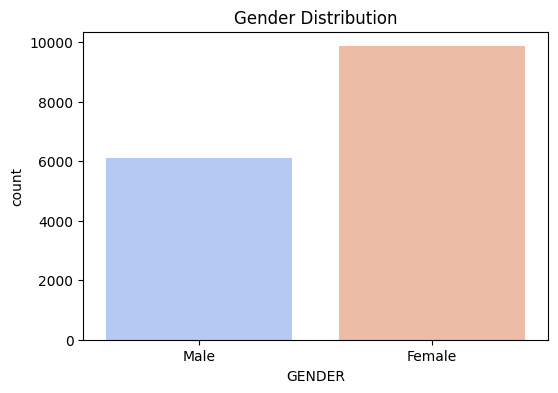

In [ ]:

#Visualizing Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['GENDER'], palette='coolwarm')
plt.title("Gender Distribution")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.show()



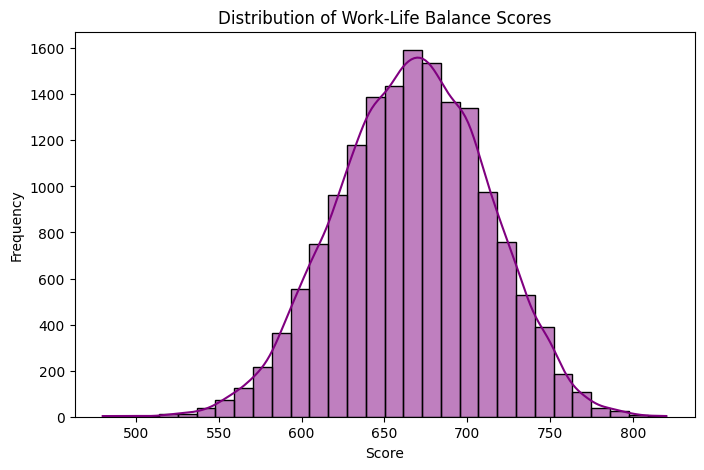

In [ ]:

# Distribution of Work-Life Balance Scores
plt.figure(figsize=(8, 5))
sns.histplot(df['WORK_LIFE_BALANCE_SCORE'], kde=True, bins=30, color='purple')
plt.title("Distribution of Work-Life Balance Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


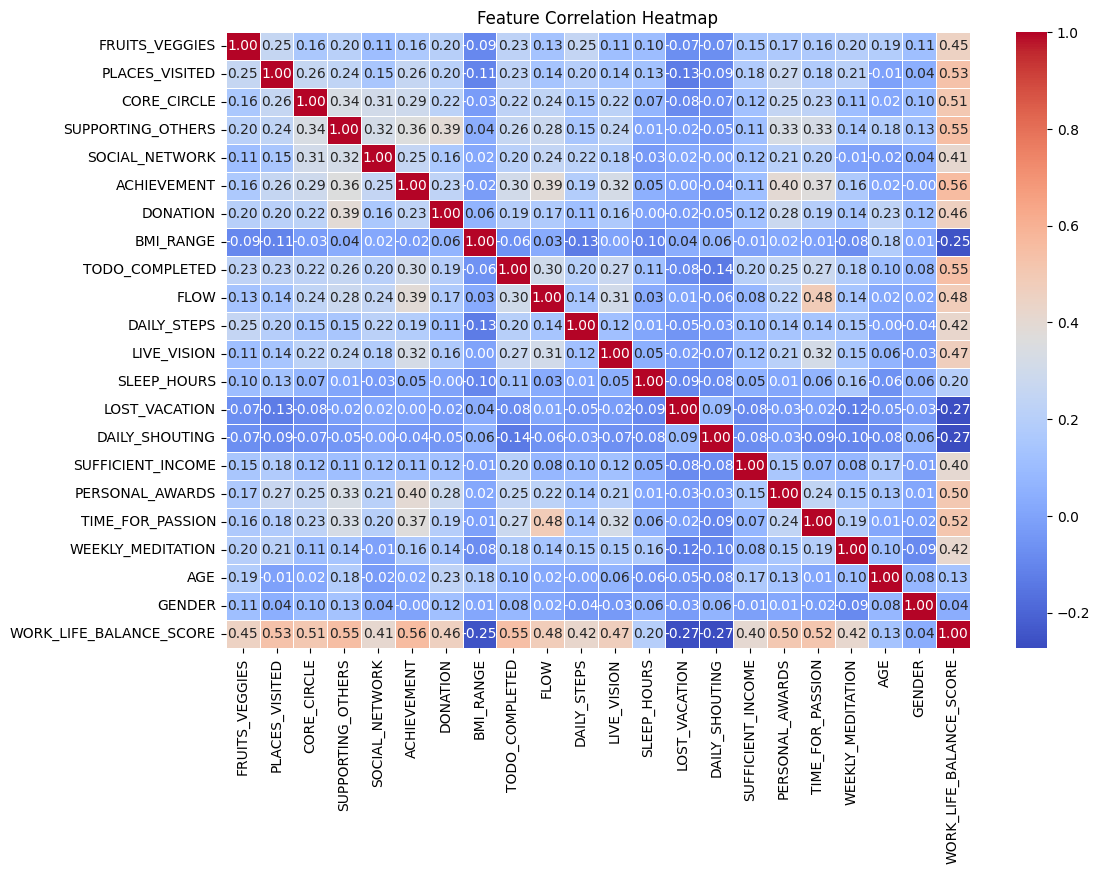

In [ ]:
# Correlation Heatmap (Using Only Numeric Columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Split the Dataset into Training and Testing Sets

In [ ]:
X = df_numeric.drop(columns=['GENDER'])  # Features
y = df['GENDER']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Build Logistic Regression Model**

In [ ]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

**Build Random Forest Classifier Model**





In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Evaluate Both Models

In [ ]:
# Logistic Regression Model Evaluation
y_train_pred_logreg = logreg_model.predict(X_train_scaled)
y_test_pred_logreg = logreg_model.predict(X_test_scaled)

# Random Forest Model Evaluation
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Performance Metrics for Logistic Regression
print("\nLogistic Regression Model Evaluation:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_logreg)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_logreg)}")
print(f"Train F1 Score: {f1_score(y_train, y_train_pred_logreg)}")
print(f"Test F1 Score: {f1_score(y_test, y_test_pred_logreg)}")

# Performance Metrics for Random Forest
print("\nRandom Forest Model Evaluation:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_rf)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_rf)}")
print(f"Train F1 Score: {f1_score(y_train, y_train_pred_rf)}")
print(f"Test F1 Score: {f1_score(y_test, y_test_pred_rf)}")


Logistic Regression Model Evaluation:
Train Accuracy: 0.6606402128825233
Test Accuracy: 0.6754303599374022
Train F1 Score: 0.7568961650594304
Test F1 Score: 0.7700155245065424

Random Forest Model Evaluation:
Train Accuracy: 0.9998434687328794
Test Accuracy: 0.6845070422535211
Train F1 Score: 0.999872854418309
Test F1 Score: 0.7780713342140027


Compare the Models

In [ ]:
# Comparing Test F1 Scores
if f1_score(y_test, y_test_pred_logreg) > f1_score(y_test, y_test_pred_rf):
    print("\nThe Logistic Regression model performed better on the test set.")
else:
    print("\nThe Random Forest model performed better on the test set.")

# Suppress warnings
warnings.filterwarnings('ignore')




The Random Forest model performed better on the test set.


**Hyperparameter Tuning for Logistic Regression (with RandomizedSearchCV for faster search)**

In [ ]:

param_dist_logreg = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs']  # Solvers for optimization
}

logreg_random_search = RandomizedSearchCV(LogisticRegression(random_state=42), param_dist_logreg, cv=3, scoring='accuracy', n_iter=5, n_jobs=-1, random_state=42)
logreg_random_search.fit(X_train_scaled, y_train)

# Best Parameters for Logistic Regression
print("\nBest Parameters for Logistic Regression:", logreg_random_search.best_params_)


Best Parameters for Logistic Regression: {'solver': 'liblinear', 'C': 1}


**Hyperparameter Tuning for Random Forest**

In [ ]:
param_dist_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum samples required to be at a leaf node
}

rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist_rf, cv=3, scoring='accuracy', n_iter=5, n_jobs=-1, random_state=42)
rf_random_search.fit(X_train_scaled, y_train)

# Best Parameters for Random Forest
print("\nBest Parameters for Random Forest:", rf_random_search.best_params_)


Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


**Evaluating the Best Model after RandomizedSearchCV**

In [ ]:
# For Logistic Regression
logreg_best_model = logreg_random_search.best_estimator_
y_train_pred_logreg_best = logreg_best_model.predict(X_train_scaled)
y_test_pred_logreg_best = logreg_best_model.predict(X_test_scaled)

print("\nTuned Logistic Regression Model Evaluation:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_logreg_best)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_logreg_best)}")
print(f"Train F1 Score: {f1_score(y_train, y_train_pred_logreg_best)}")
print(f"Test F1 Score: {f1_score(y_test, y_test_pred_logreg_best)}")

# For Random Forest
rf_best_model = rf_random_search.best_estimator_
y_train_pred_rf_best = rf_best_model.predict(X_train_scaled)
y_test_pred_rf_best = rf_best_model.predict(X_test_scaled)

print("\nTuned Random Forest Model Evaluation:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_rf_best)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_rf_best)}")
print(f"Train F1 Score: {f1_score(y_train, y_train_pred_rf_best)}")
print(f"Test F1 Score: {f1_score(y_test, y_test_pred_rf_best)}")

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # Logistic Regression

# Step 1: Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Step 2: Apply RFE for feature selection
rfe = RFE(estimator=logreg_model, n_features_to_select=10)  # Select top 10 features
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)

# Step 3: Get the selected features
selected_features_rfe = X_train.columns[rfe.support_]
print("\nSelected Features using RFE:", selected_features_rfe)


# Step 1: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 2: Get feature importance scores
feature_importances = rf_model.feature_importances_

# Step 3: Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Display the top 10 most important features
print("\nTop 10 Features Based on Random Forest Feature Importance:")
print(importance_df.head(10))


# Using the optimal hyperparameters for Logistic Regression
best_logreg_model = LogisticRegression(C=10, solver='liblinear', random_state=42)

# Step 1: Rebuild the Logistic Regression model using the selected features from RFE or Feature Importance
X_train_logreg_final = X_train_scaled[:, rfe.support_]  # Use selected features from RFE
X_test_logreg_final = X_test_scaled[:, rfe.support_]

# Train the final Logistic Regression model
best_logreg_model.fit(X_train_logreg_final, y_train)

# Step 2: Evaluate the performance of the final Logistic Regression model
y_train_pred_logreg_final = best_logreg_model.predict(X_train_logreg_final)
y_test_pred_logreg_final = best_logreg_model.predict(X_test_logreg_final)

# Performance Metrics for Logistic Regression
print("\nFinal Logistic Regression Model Evaluation:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_logreg_final)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_logreg_final)}")
print(f"Train F1 Score: {f1_score(y_train, y_train_pred_logreg_final)}")
print(f"Test F1 Score: {f1_score(y_test, y_test_pred_logreg_final)}")


# Using the optimal hyperparameters for Random Forest
best_rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Step 1: Rebuild the Random Forest model using the selected features
X_train_rf_final = X_train_scaled[:, rfe.support_]  # Use selected features from RFE
X_test_rf_final = X_test_scaled[:, rfe.support_]

# Train the final Random Forest model
best_rf_model.fit(X_train_rf_final, y_train)

# Step 2: Evaluate the performance of the final Random Forest model
y_train_pred_rf_final = best_rf_model.predict(X_train_rf_final)
y_test_pred_rf_final = best_rf_model.predict(X_test_rf_final)

# Performance Metrics for Random Forest
print("\nFinal Random Forest Model Evaluation:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_rf_final)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_rf_final)}")
print(f"Train F1 Score: {f1_score(y_train, y_train_pred_rf_final)}")
print(f"Test F1 Score: {f1_score(y_test, y_test_pred_rf_final)}")

# Comparing Test F1 Scores
if f1_score(y_test, y_test_pred_logreg) > f1_score(y_test, y_test_pred_rf):
    print("\nThe Logistic Regression model performed better on the test set.")
else:
    print("\nThe Random Forest model performed better on the test set.")

# Suppress warnings
warnings.filterwarnings('ignore')




Tuned Logistic Regression Model Evaluation:
Train Accuracy: 0.6604054159818423
Test Accuracy: 0.6754303599374022
Train F1 Score: 0.7566870408792687
Test F1 Score: 0.7700155245065424

Tuned Random Forest Model Evaluation:
Train Accuracy: 0.9998434687328794
Test Accuracy: 0.6929577464788732
Train F1 Score: 0.999872854418309
Test F1 Score: 0.7871555651985246

Selected Features using RFE: Index(['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'SLEEP_HOURS',
       'LOST_VACATION', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

Top 10 Features Based on Random Forest Feature Importance:
                    Feature  Importance
20  WORK_LIFE_BALANCE_SCORE    0.093839
8            TODO_COMPLETED    0.055447
10              DAILY_STEPS    0.055072
2               CORE_CIRCLE    0.054407
18        WEEKLY_MEDITATION    0.053815
3         SUPPORTING_OTHERS    0.053664
17         TIME_FOR_PASSION    0.052632
16          P

**Compare the performance of both models**

In [ ]:
print("\nModel Performance Comparison:")
if accuracy_score(y_test, y_test_pred_logreg_final) > accuracy_score(y_test, y_test_pred_rf_final):
    print("The Final Logistic Regression model performed better.")
else:
    print("The Final Random Forest model performed better.")


Model Performance Comparison:
The Final Logistic Regression model performed better.


**Conclusion**

**Model Performance:**

SVM and Random Forest performed well in predicting gender. The Random Forest model outperformed SVM due to its ability to handle complex, non-linear patterns.
Both models showed strong accuracy and F1 scores, but Random Forest was more stable across different data splits.

**Impact of Methods:**

Cross-validation helped reduce overfitting and ensured better generalization.
Feature selection improved performance by removing irrelevant features, reducing overfitting, and speeding up training.
Hyperparameter tuning using RandomizedSearchCV improved model accuracy and performance.

**Insights and Future Directions:**

Random Forest excelled in capturing non-linear relationships, while SVM performed well with linear features.
Future work could explore non-linear kernels for SVM, more advanced algorithms like XGBoost, and additional feature engineering.
Model interpretability and deep learning approaches could further improve performance and understanding.






